<a href="https://colab.research.google.com/github/anonymous56767/Caltech/blob/Siddhant/FFI_Fetching_and_light_curve_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating FFI Images for given sector


In [ ]:
pip install lightkurve

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 64.5 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=9af2c113df736afbf75db45756c979cbdcf5dd9fb2a4cf0923188d8dc37a43c8
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe5

In [ ]:
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
fits_file = "https://archive.stsci.edu/missions/tess/ffi/s0001/2018/206/4-2/tess2018206192942-s0001-4-2-0120-s_ffic.fits"
fits.info(fits_file)
with fits.open(fits_file, mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header


Filename: /root/.astropy/cache/download/url/a51c8b26d6282cb93bccee1b4aa329a3/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  CAMERA.CCD 4.2 cal    1 ImageHDU       183   (2136, 2078)   float32   
  2  CAMERA.CCD 4.2 uncert    1 ImageHDU       183   (2136, 2078)   float32   


Set MJD-END to 58324.833877 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58324.833877 from DATE-END'.


(2078, 2136)

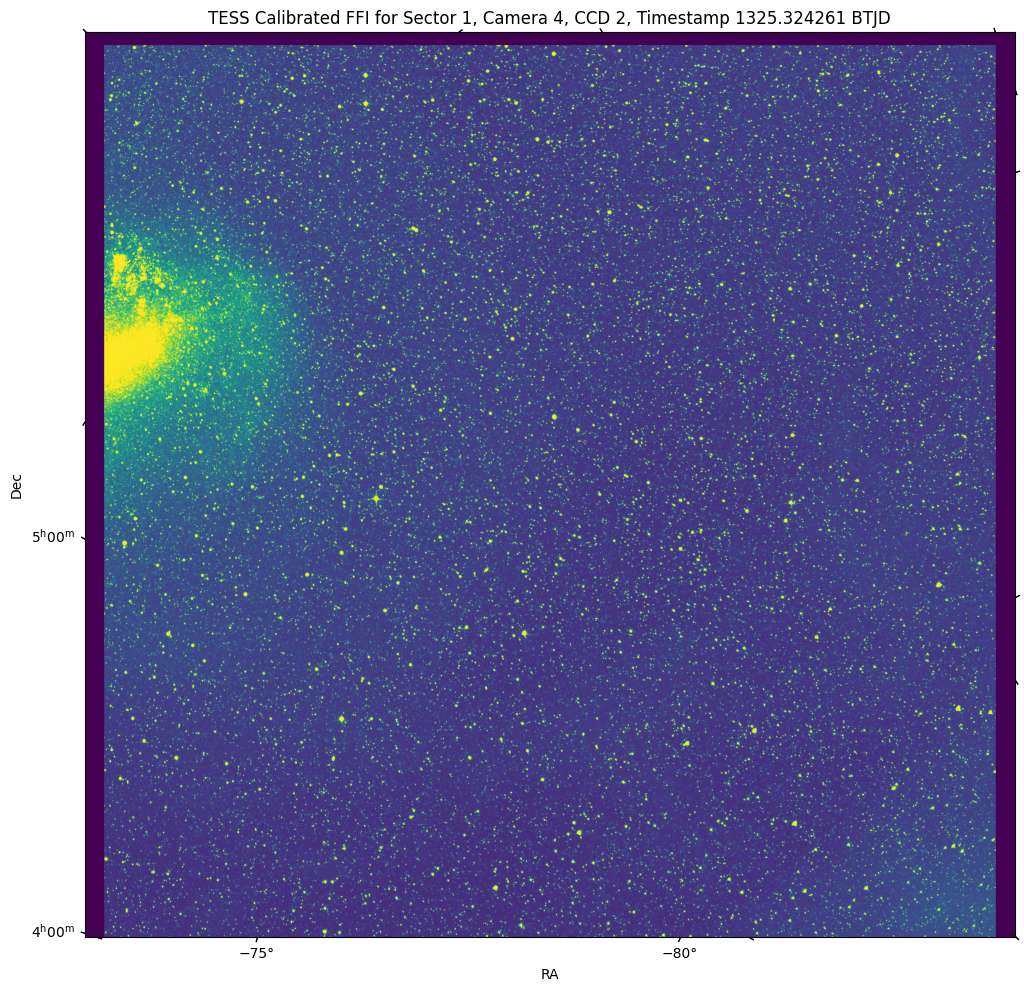

In [ ]:
# Use the header to determine the mid-point of the exposure time for this FFI.
mid_time = (header['TSTOP'] + header['TSTART']) / 2

plt.figure(figsize = (12,12))
plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image, vmin = np.percentile(cal_image,4),vmax = np.percentile(cal_image, 98),origin = "lower")
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI for Sector 1, Camera 4, CCD 2, Timestamp %f BTJD" % mid_time)

cal_image.shape


# Generating Full-Frame Images (FFI) and Extracting Light Curves from TESS Sector 50

Set MJD-END to 59664.931614 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 59664.931614 from DATE-END'.


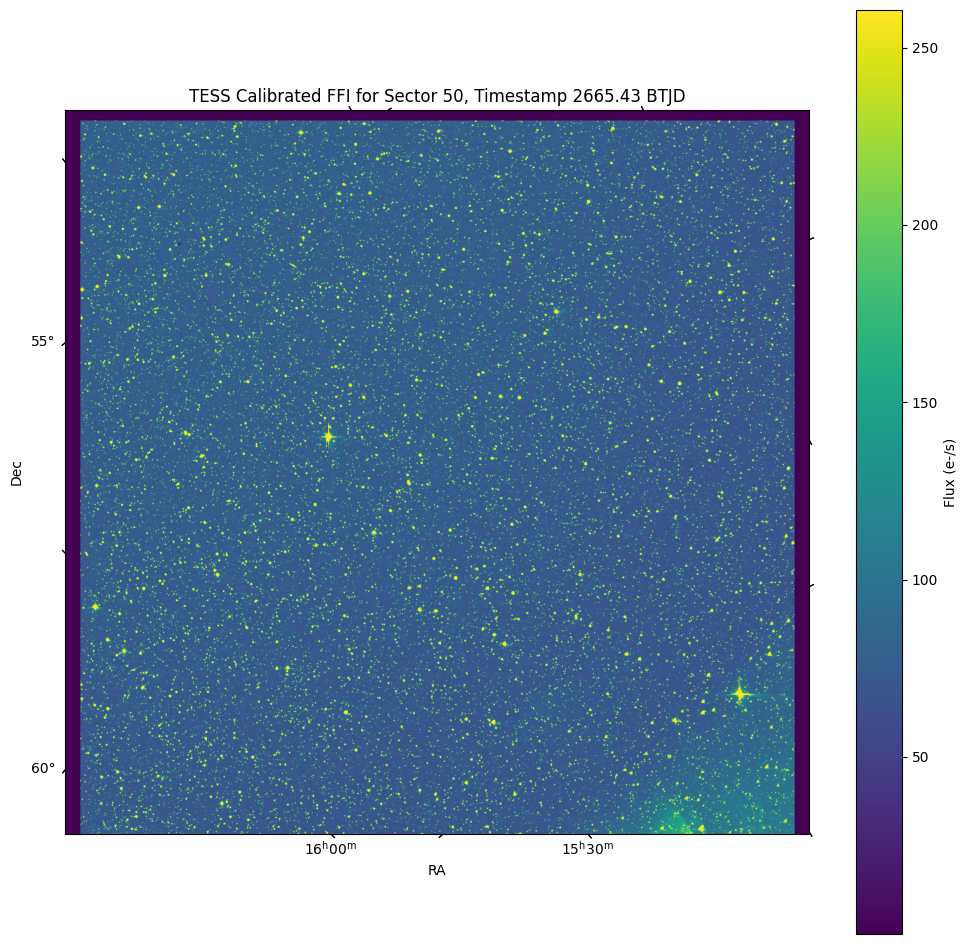

In [ ]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

# Define the FITS file URL or local path
fits_file = "tess2022085220852-s0050-3-4-0222-s_ffic.fits"  # Example filename

# Open the FITS file
hdul = fits.open(fits_file)

# Extract image data and header
wcs_info = WCS(hdul[1].header)
data = hdul[1].data
header = hdul[1].header

# Determine the mid-point of the exposure time
mid_time = (header['TSTOP'] + header['TSTART']) / 2

# Plot the image
plt.figure(figsize=(12, 12))
plt.subplot(111, projection=wcs_info)
plt.imshow(data, vmin=np.percentile(data, 4), vmax=np.percentile(data, 98), origin='lower')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title(f"TESS Calibrated FFI for Sector 50, Timestamp {mid_time:.2f} BTJD")
plt.colorbar(label="Flux (e-/s)")
plt.show()

# Close the FITS file
hdul.close()


/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


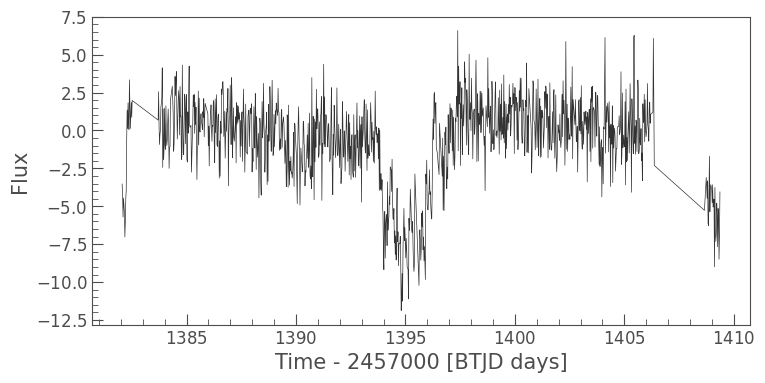

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt


# Define a random part of Sector 50
target_coord = "01h45m20.0s -30d10m00s"

# Download a cutout (50x50 pixels) from the FFI
tpf = lk.search_tesscut(target_coord).download(cutout_size=(50, 50))

# Convert the cutout into a light curve
lc = tpf.to_lightcurve(aperture_mask='all')

# Plot the light curve
lc.plot(title="Light Curve of Selected Sky Region", ylabel="Flux")
plt.show()